In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


C:\Users\user\AppData\Local\Temp\ipykernel_25996\1932536531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_bp_genre = pd.read_csv('./bp_genre.csv')
df_bp_track = pd.read_csv('./bp_track.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_25996\1804886045.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bp_track = pd.read_csv('./bp_track.csv')


In [3]:
df_bp_genre.head()

,genre_id,genre_name,song_count,genre_url,updated_on
0,8,Hard Dance / Hardcore,178646,/genre/hard-dance-hardcore/8,2023-09-19 15:01:03
1,50,Nu Disco / Disco,157934,/genre/nu-disco-disco/50,2023-09-19 15:01:03
2,12,Deep House,897280,/genre/deep-house/12,2023-09-19 15:01:03
3,85,Bass / Club,20716,/genre/bass-club/85,2023-09-19 15:01:03
4,94,Electro (Classic / Detroit / Modern),19615,/genre/electro-classic-detroit-modern/94,2023-09-19 15:01:03


In [4]:
df_bp_track.head()

,track_id,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,duration_ms,isrc,key_id,label_id,release_id,updated_on,is_matched_spot
0,17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130,6:48,408830.0,DECY62300081,23.0,3222,4144460,2023-09-14 16:19:56,NaN
1,17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124,6:47,407439.0,GBCDK2303028,15.0,258,4091230,2023-09-14 16:19:56,NaN
2,17610338,Akawi,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/akawi/17610338,124,7:17,437066.0,GBCDK2303029,22.0,258,4091230,2023-09-14 16:19:56,NaN
3,17658499,Interplanetary Species,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/interplanetary-species/1765...,93,6:27,387096.0,DELK12300089,24.0,68438,4106998,2023-09-14 16:19:56,NaN
4,17658498,Echoing Planetary Motion,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/echoing-planetary-motion/17...,125,7:40,460800.0,DELK12300088,20.0,68438,4106998,2023-09-14 16:19:56,NaN


In [5]:
# Incluir la columna genre_name y la duración en segundos en el dataset final
df_final = pd.merge(df_bp_track, df_bp_genre[['genre_id', 'genre_name']], on = 'genre_id', how = 'left')
df_final['duracion_segundos'] = df_final['duration_ms'] / 1000

In [6]:
df_final.describe()

,track_id,genre_id,subgenre_id,bpm,duration_ms,key_id,label_id,release_id,duracion_segundos
count,1.068533e+07,1.068533e+07,715425.000000,1.068533e+07,1.068270e+07,1.067908e+07,1.068533e+07,1.068533e+07,1.068270e+07
mean,1.012787e+07,2.124393e+01,213.801935,1.207246e+02,3.445434e+05,1.321047e+01,3.889163e+04,2.267419e+06,3.445434e+02
std,5.188218e+06,2.791291e+01,63.433043,1.912638e+01,2.021613e+05,8.739974e+00,2.846908e+04,1.157646e+06,2.021613e+02
min,4.971000e+03,1.000000e+00,5.000000,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,3.400000e+01,0.000000e+00
25%,5.745950e+06,5.000000e+00,210.000000,1.200000e+02,2.505030e+05,6.000000e+00,1.520000e+04,1.365546e+06,2.505030e+02
50%,1.063708e+07,1.100000e+01,246.000000,1.250000e+02,3.480290e+05,9.000000e+00,3.294200e+04,2.298173e+06,3.480290e+02
75%,1.472322e+07,1.500000e+01,246.000000,1.280000e+02,4.147200e+05,2.000000e+01,6.093900e+04,3.235510e+06,4.147200e+02
max,1.815576e+07,9.900000e+01,268.000000,2.580000e+02,2.300677e+07,3.400000e+01,1.162360e+05,4.271957e+06,2.300677e+04


# Identificación de Datos nulos

In [7]:
#Reemplazar los 0s por nan a bpm, suration_ms y duracion_segundos porque eran las columnas que tienen un min de 0 y no tiene sentido
df_final[['bpm','duration_ms','duracion_segundos']] = df_final[['bpm','duration_ms','duracion_segundos']].replace(0, np.nan)
df_final.head()

,track_id,title,mix,is_remixed,release_date,genre_id,subgenre_id,track_url,bpm,duration,duration_ms,isrc,key_id,label_id,release_id,updated_on,is_matched_spot,genre_name,duracion_segundos
0,17775434,Navigator 3000,Original Mix,f,2023-06-09,99,266.0,beatport.com/track/navigator-3000/17775434,130.0,6:48,408830.0,DECY62300081,23.0,3222,4144460,2023-09-14 16:19:56,NaN,Trance (Raw / Deep / Hypnotic),408.830
1,17610335,Nehorah,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/nehorah/17610335,124.0,6:47,407439.0,GBCDK2303028,15.0,258,4091230,2023-09-14 16:19:56,NaN,Trance (Raw / Deep / Hypnotic),407.439
2,17610338,Akawi,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/akawi/17610338,124.0,7:17,437066.0,GBCDK2303029,22.0,258,4091230,2023-09-14 16:19:56,NaN,Trance (Raw / Deep / Hypnotic),437.066
3,17658499,Interplanetary Species,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/interplanetary-species/1765...,93.0,6:27,387096.0,DELK12300089,24.0,68438,4106998,2023-09-14 16:19:56,NaN,Trance (Raw / Deep / Hypnotic),387.096
4,17658498,Echoing Planetary Motion,Original Mix,f,2023-06-05,99,265.0,beatport.com/track/echoing-planetary-motion/17...,125.0,7:40,460800.0,DELK12300088,20.0,68438,4106998,2023-09-14 16:19:56,NaN,Trance (Raw / Deep / Hypnotic),460.800


In [8]:
nulos = df_final.isnull().sum()
nulos

track_id                   0
title                     57
mix                        4
is_remixed                 0
release_date               0
genre_id                   0
subgenre_id          9969906
track_url                  0
bpm                    37972
duration                2632
duration_ms             2713
isrc                  295778
key_id                  6254
label_id                   0
release_id                 0
updated_on                 0
is_matched_spot      3677162
genre_name                 0
duracion_segundos       2713
dtype: int64

In [9]:
nulos_por_columna = df_final[['bpm', 'duration_ms', 'duracion_segundos']].isnull().sum()
nulos_por_columna

bpm                  37972
duration_ms           2713
duracion_segundos     2713
dtype: int64

# Visualización 1
## Pregunta - Hipótesis
- Pregunta: ¿Cuál es la distribución de los BPM de las canciones en el dataset? ¿Hay un BPM común que predomine en todos los géneros?
- Hipótesis: Los géneros van a presentar en general BPM distintos, reflejando las diferencias entre los géneros musicales.

## Análisis:
- La mayoría de los datos se concentran alrededor de 125-150 BPM. Esto sugiere que hay una fuerte tendencia hacia este rango de BPM
- Se podría afirmar que la distribución de los BPM parece ser unimodal, lo que significa que hay un solo pico principal. Esto puede indicar que hay un 'tempo' preferido o más común entre las piezas de música o las muestras de datos analizados.
- Luego del rango de mayor frecuencia hay una caída abrupta, lo que da a entender que muy pocas canciones se encuentran con BPMs por encima de los 150
    

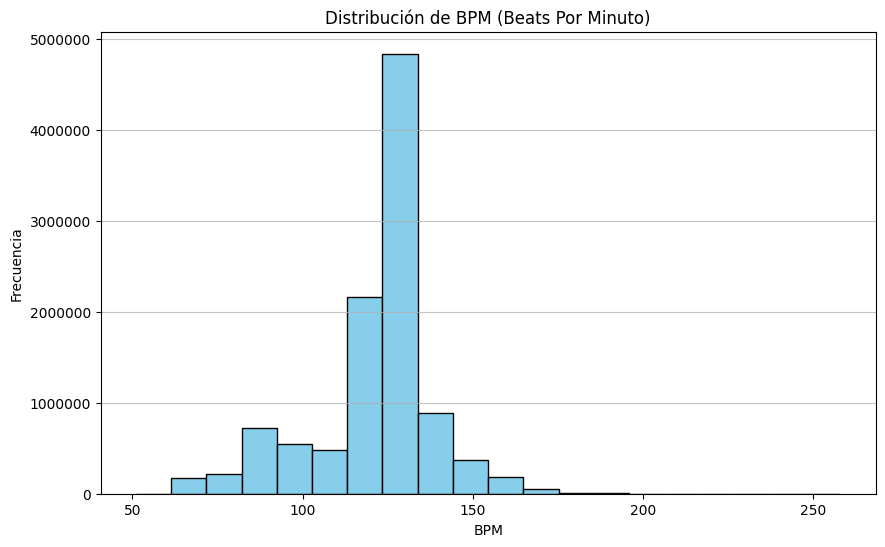

In [10]:
# Visualización 1: Distribución de BPM
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df_final['bpm'], bins = 20, color = 'skyblue', edgecolor = 'black')
ax.set_title('Distribución de BPM (Beats Por Minuto)')
ax.set_xlabel('BPM')
ax.set_ylabel('Frecuencia')
ax.grid(axis='y', alpha = 0.75)
plt.gca().ticklabel_format(style='plain', axis = 'y')
fig.savefig('mpl_histograma.png')

# Visualización 2:
## Pregunta - Hipótesis

- Pregunta: ¿Cómo ha cambiado la popularidad de un género musical específico o la cantidad de canciones producidas a lo largo del tiempo?
- Hipótesis: Existe una tendencia creciente en la producción de canciones de ciertos géneros, posiblemente debido a cambios en las preferencias culturales y tecnológicas.

## Análisis:
- Hay un claro crecimiento exponencial en el número de pistas lanzadas a lo largo del tiempo. El crecimiento es lento y estable en las primeras décadas, y se vuelve mucho más pronunciado después del año 2000.
- El marcado aumento en el número de pistas lanzadas después de los años 2000 puede estar relacionado con la digitalización de la música. Esto incluye el desarrollo y popularización de la música digital, servicios de streaming y plataformas de distribución en línea, lo que facilita la producción y publicación de música.
- En los últimos años de la gráfica, se observa una mayor volatilidad con picos más altos y caídas abruptas. Esto podría deberse a factores estacionales, tendencias de lanzamientos (como álbumes o singles), o posiblemente cambios en cómo se cuenta el número de pistas (por ejemplo, contando remixes o versiones diferentes).
- El gráfico refleja la influencia de la tecnología en la producción musical. A medida que ha sido más fácil grabar y distribuir música, más artistas han podido lanzar sus trabajos al público.
- Este crecimiento también puede indicar cambios estructurales en la industria de la música, donde los artistas ahora tienen más control sobre su producción y distribución, posiblemente reduciendo la barrera de entrada al mercado de la música.

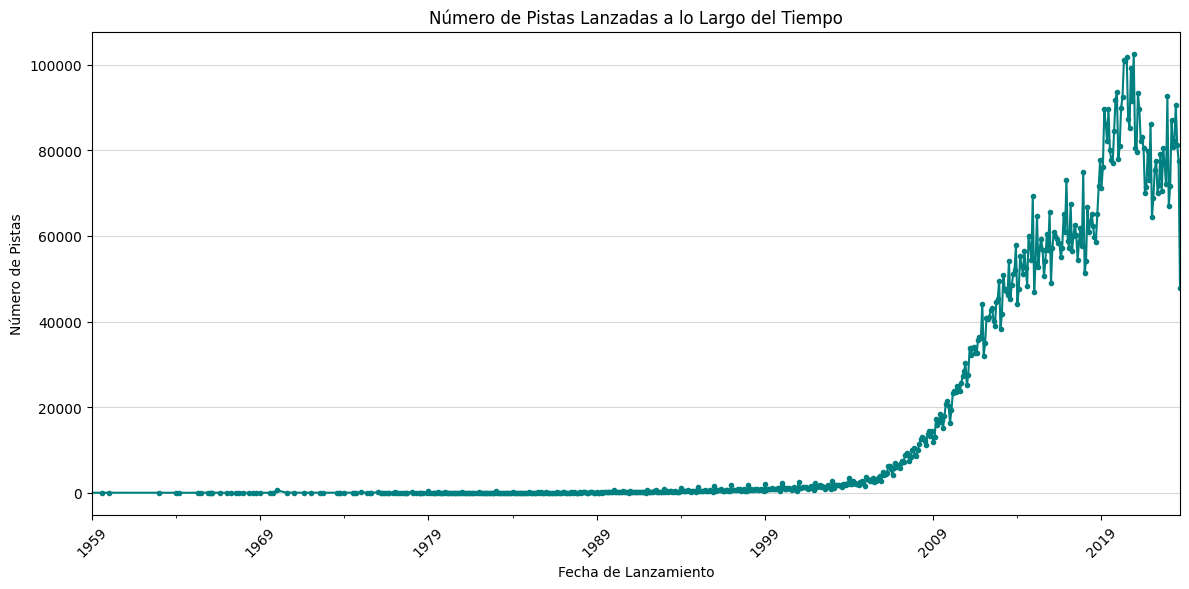

In [11]:
df_final['release_date'] = pd.to_datetime(df_final['release_date'])
tendencia_lanzamientos = df_final.groupby(df_final['release_date'].dt.to_period("M")).size()

# Visualización 2: Número de Pistas Lanzadas a lo Largo del Tiempo
fig, ax = plt.subplots(figsize = (12, 6))
tendencia_lanzamientos.plot(kind = 'line', color = 'teal', marker = '.')
ax.set_title('Número de Pistas Lanzadas a lo Largo del Tiempo')
ax.set_xlabel('Fecha de Lanzamiento')
ax.set_ylabel('Número de Pistas')
ax.grid(axis='y', alpha=0.5)
ax.set_xlim(left=pd.Timestamp('1959-01-01'))
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig('mpl_serie_de_tiempo')


## Análisis 2.1

- Se observa que ciertos géneros como Electrónica, Techno y House han tenido picos significativos en el número de lanzamientos a lo largo del tiempo. Esto podría sugerir un aumento en la popularidad o una respuesta a eventos específicos del mercado, como festivales o tendencias culturales.
- Los picos anormales, especialmente el pico extremadamente alto en un género alrededor del año 2019, podrían ser el resultado de igualmente tendencias mundiales en cuanto al gusto en la música Electrónica, Tecnho, House, etc.

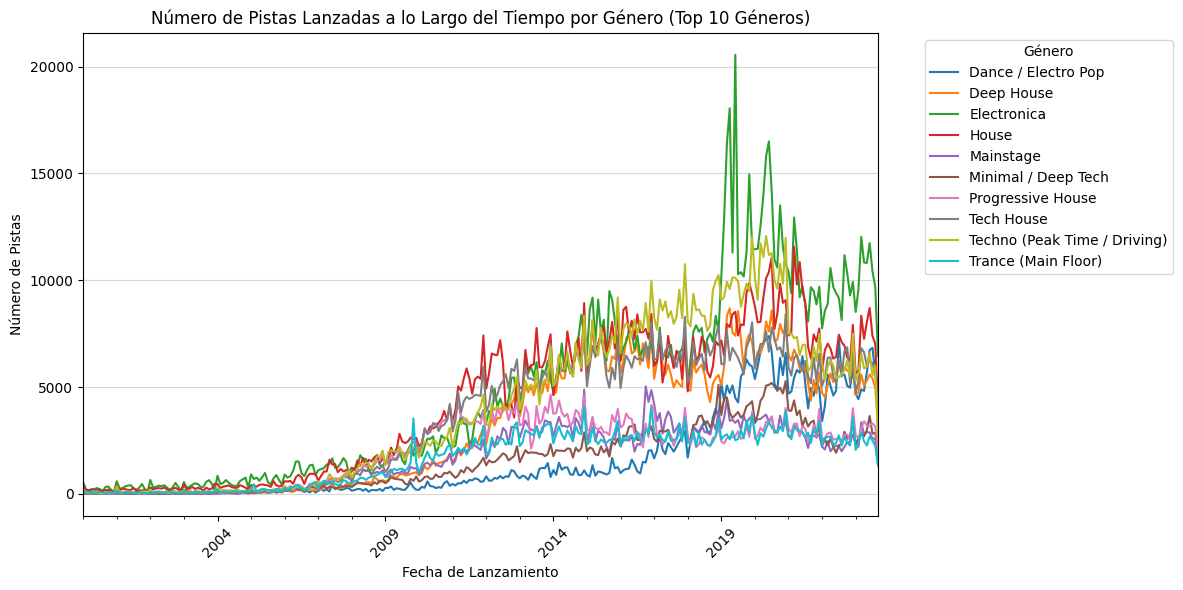

In [12]:
df_final['release_date'] = pd.to_datetime(df_final['release_date'])
top10_generos = df_final['genre_name'].value_counts().head(10).index
df_top10_generos = df_final[df_final['genre_name'].isin(top10_generos)]
tendencia_lanzamientos = df_top10_generos.groupby(['genre_name', df_final['release_date'].dt.to_period("M")]).size()
tendencia_lanzamientos = tendencia_lanzamientos.unstack(level=0)

# Visualización 2.1: Número de Pistas Lanzadas a lo Largo del Tiempo por Género (Top 10 Géneros)
fig, ax = plt.subplots(figsize=(12, 6))
for genre in tendencia_lanzamientos.columns:
    tendencia_lanzamientos[genre].plot(kind='line', ax=ax, label=genre)

ax.set_title('Número de Pistas Lanzadas a lo Largo del Tiempo por Género (Top 10 Géneros)')
ax.set_xlabel('Fecha de Lanzamiento')
ax.set_ylabel('Número de Pistas')
ax.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.5)
ax.set_xlim(left=pd.Timestamp('2000-01-01'))
plt.xticks(rotation=45)
plt.tight_layout()
fig.savefig('mpl_serie_de_tiempo_genero')

plt.show() 

# Visualización 3
## Pregunta - Hipótesis
- Pregunta: ¿Cómo se distribuyen los géneros musicales en el dataset? ¿Existe un género que domine claramente sobre los demás?
- Hipótesis: Un pequeño número de géneros musicales populares representan una gran proporción del dataset, indicando una concentración de preferencias en el mercado.
## Análisis
- Los géneros con las mayores porciones son 'Electronica' con 12.6% y 'House' con 11.3%. Esto sugiere que son los géneros más populares o con más pistas disponibles dentro del conjunto de datos analizado.
- La gráfica muestra una amplia variedad de géneros, que van desde 'Techno (Peak Time / Driving)' con 10.9% hasta géneros con porciones más pequeñas como 'Psy-Trance', 'Drum & Bass', 'Trap / Wave', cada uno con 1.9%. Esta diversidad indica una industria musical rica y variada.
- : La categoría 'Otros' representa un 12.2%, lo que indica que hay una cantidad significativa de pistas que no encajan en las categorías listadas o que representan una gran cantidad de subgéneros o géneros menos comunes. Esto también puede sugerir que la música está evolucionando y que surgen nuevos géneros que aún no han sido categorizados de manera convencional.
- Las variantes de House y Techno parecen ser muy populares, ya que ocupan varias categorías en el gráfico, tales como 'Tech House', 'Deep House', 'Melodic House & Techno', y 'Techno (Peak Time / Driving)', lo que refleja la popularidad de estos estilos en la cultura musical electrónica actual.

In [13]:
df_final['genre_name'].value_counts()

genre_name
Electronica                             1349722
House                                   1205119
Techno (Peak Time / Driving)            1162483
Tech House                              1002904
Deep House                               895499
Progressive House                        575370
Mainstage                                498698
Trance (Main Floor)                      477997
Dance / Electro Pop                      472783
Minimal / Deep Tech                      449823
Trap / Wave                              351635
Drum & Bass                              346977
Psy-Trance                               205955
Breaks / Breakbeat / UK Bass             197741
Melodic House & Techno                   187735
Indie Dance                              181853
Hard Dance / Hardcore                    177874
Dubstep                                  154031
Nu Disco / Disco                         153421
Techno (Raw / Deep / Hypnotic)           125391
Organic House / Downtempo    

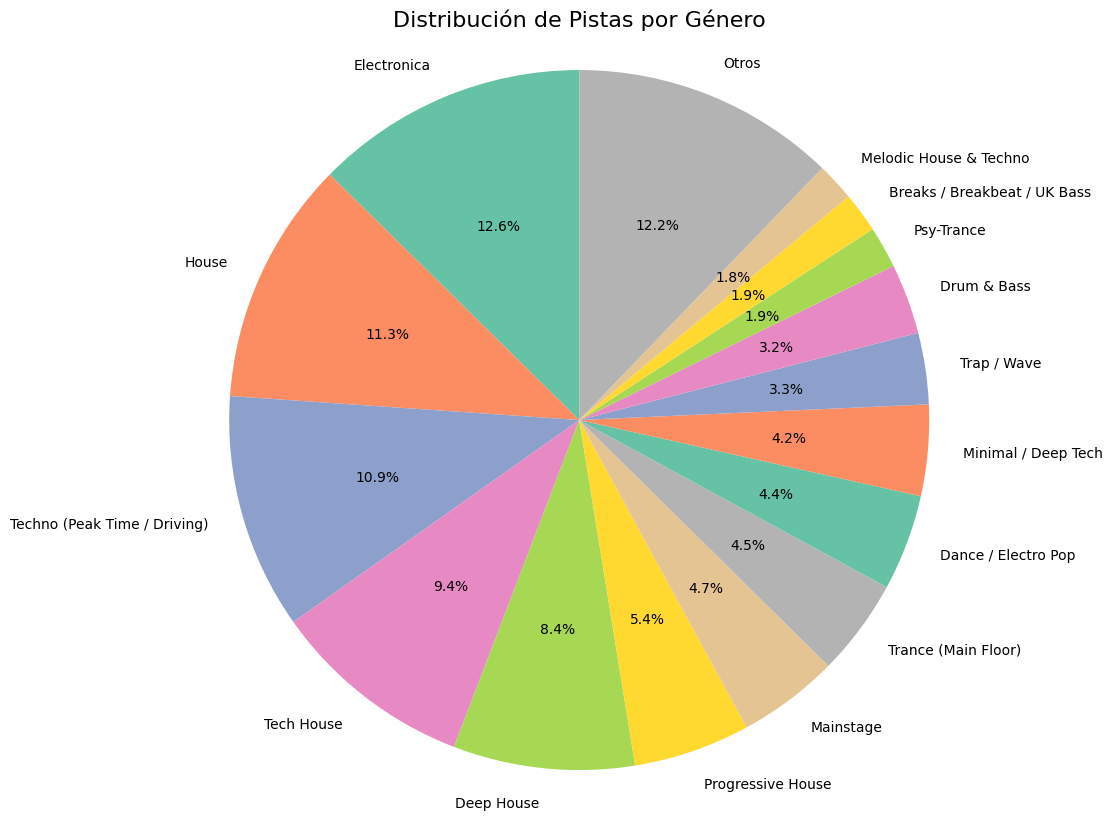

In [14]:
conteo_generos = df_final['genre_name'].value_counts()

# Como hay demasiadas categorías pequeñas, agruparlas en 'Otros'
if len(conteo_generos) > 15:
    conteo_otros = conteo_generos[15:].sum()
    conteo_generos = conteo_generos[:15]
    conteo_generos['Otros'] = conteo_otros

# Visualización 3: Distribución por Género
fig, ax = plt.subplots(figsize=(12, 10))
ax.pie(conteo_generos, labels = conteo_generos.index, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette('Set2'))
ax.set_title('Distribución de Pistas por Género', fontdict={'fontsize':16})
plt.axis('equal')
fig.savefig('mpl_piechart.png')




# Visualización 4
## Pregunta - Análisis:
- Pregunta: ¿Cuáles son las diferencias en los BPMs entre los géneros musicales?
- Hipótesis: Algunos géneros musicales tienen características más uniformes (menor dispersión), lo que indica un estilo más coherente.
## Análisis:
- La mediana de BPM varía significativamente entre los géneros. Algunos géneros como 'Electronica' tienen medianas más bajas y rangos más amplios, lo que indica una mayor variabilidad en los BPM. Otros géneros, como 'Dance / Electro Pop', muestran una mediana más alta con menos variabilidad.
- Casi todos los géneros tienen valores atípicos, indicando que hay pistas con BPMs significativamente más altos o más bajos que la mayoría de las pistas dentro de ese género. Esto puede ser debido a la experimentación artística o a la influencia de subgéneros.
- Géneros como 'Techno (Peak Time / Driving)' y 'Tech House' tienen boxplots relativamente largos con muchas observaciones fuera de los 'bigotes', sugiriendo que, aunque hay un BPM predominante, hay bastante diversidad dentro del género.
- Los géneros de música electrónica tienden a tener rangos de BPM bastante definidos, lo que sugiere que los artistas y productores se adhieren a ciertas normas de tempo para cumplir con las expectativas del género. Los géneros con rangos más estrechos, como 'Mainstage', podrían tener una identidad más fuerte asociada con un BPM específico.

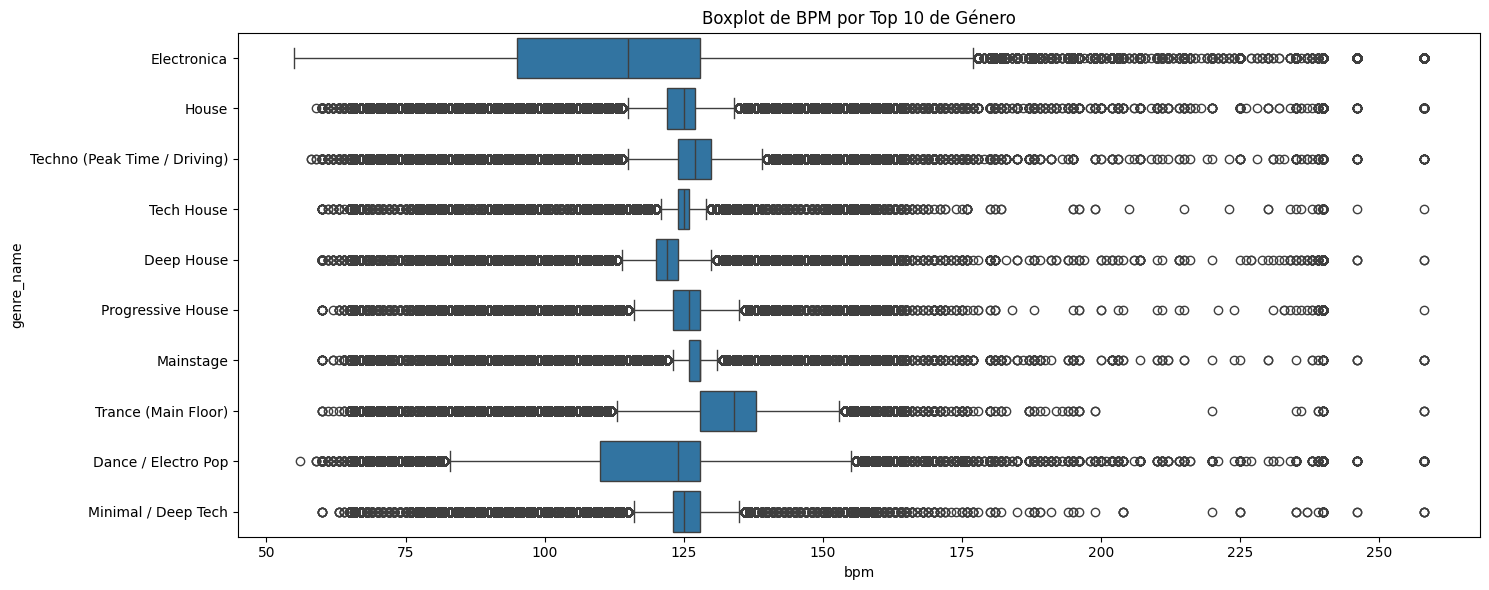

In [15]:
# sns.set_palette("Set2")

df_final['release_date'] = pd.to_datetime(df_final['release_date'])
df_final['release_month'] = df_final['release_date'].dt.month

top_generos_final = df_final['genre_name'].value_counts().nlargest(10).index
df_final_top_generos = df_final[df_final['genre_name'].isin(top_generos_final)]

# Gráfica 1: Boxplot de BPM por Género
plt.figure(figsize=(15, 6))
plt.subplot()
ax = sns.boxplot(x = 'bpm', y = 'genre_name', data = df_final_top_generos, order = top_generos_final)
plt.title('Boxplot de BPM por Top 10 de Género')
plt.tight_layout()
plt.savefig('sns_boxplot.png')
plt.show()



In [16]:
release_counts = df_final['release_month'].value_counts()
release_counts

release_month
12    978060
3     955486
6     950852
7     924776
5     914915
4     910293
10    879916
9     862172
11    858765
8     843981
2     818560
1     787555
Name: count, dtype: int64

# Visualización 5 y 6
## Pregunta - Análisis
- Pregunta: En general, se realizan lanzamientos de manera constante a  lo largo del año?
- Hipótesis: Deben haber épocas de mayor cantidad de lanzamientos, debido a factores tanto financieros, como a tendencias en el mercado.

- Pregunta: ¿Cuál es la relación entre la duración de la canción y los BPMs y cómo se distribuyen entre las canciones?
- Hipótesis: Entre más larga la canción, mayor serán los BPMs, debido a que pueden deberse a sets de música electrónica o tecno con un ritmo elevado.

## Análisis 5:
- El mes con menos lanzamientos es Enero, lo que puede indicar una desaceleración después de la temporada de vacaciones o el cierre del año fiscal para muchas compañías discográficas.
- De manera contraria, el mes con mayor cantidad de lanzamientos es Diciembre, época en la que se deben generar mayor cantidad de ingresos en las compañías discográficas debido a la alta demanda alrededor del mundo.

## Análisis 6:
- No hay una tendencia clara que relacione la duración de las pistas con los BPM, lo que sugiere que la duración de una pista no está directamente relacionada con su tempo.
- La mayoría de las pistas tienen una duración que va de los 0 a los 4000 segundos (hasta poco más de una hora), y los BPM están principalmente entre 50 y 200.
- Los puntos que están más alejados en la parte derecha del gráfico podrían representar mixes o sets más largos, mientras que aquellos con BPM más altos podrían ser géneros de música electrónica rápida o remixes con tempos incrementados.

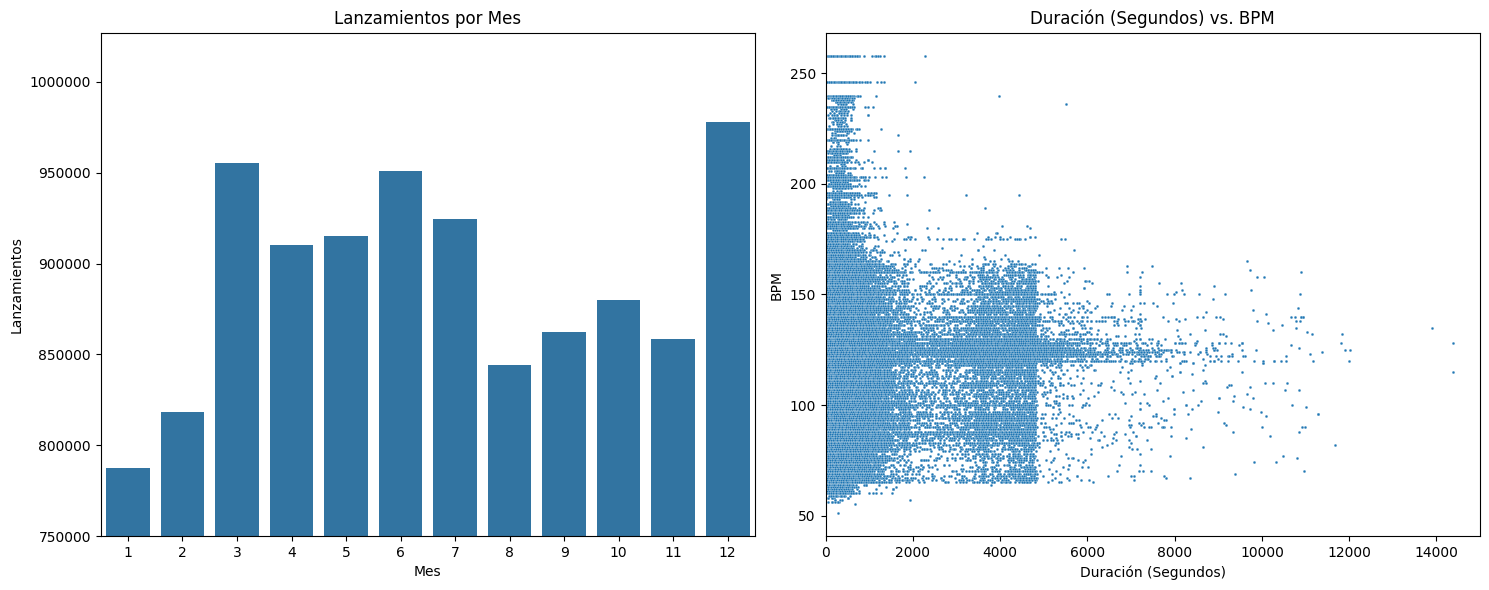

In [18]:
plt.figure(figsize=(15, 6))
# Gráfica 2: Countplot de Lanzamientos por Mes
plt.subplot(1, 2, 1)
sns.countplot(x = 'release_month', data = df_final)
plt.title('Lanzamientos por Mes')
plt.gca().ticklabel_format(style = 'plain', axis = 'y')
plt.xlabel('Mes')
plt.ylabel('Lanzamientos')
plt.ylim(750000)



# Gráfica 3: Scatterplot de Duración vs. BPM
df_final_limpia = df_final.dropna(subset=['duration_ms', 'bpm','duracion_segundos'])
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'duracion_segundos', y = 'bpm', data = df_final_limpia, s = 4)
plt.title('Duración (Segundos) vs. BPM')
plt.xlabel('Duración (Segundos)')
plt.ylabel('BPM')
plt.xlim(0,15000)

plt.tight_layout()
plt.savefig('sns_countplot_scatterplot.png')
plt.show()